# Robotic Systems II (ECE-DK904)

## Electrical and Computer Engineering Department, University of Patras, Greece

**Instructor:** Konstantinos Chatzilygeroudis (costashatz@upatras.gr)

## Lab 8

### Differential Dynamic Programming (DDP)

Non linear trajectory optimization method (aka usually offline). In other words, we want to solve the following:

$\arg\min_{\boldsymbol{x}_{1:K}, \boldsymbol{u}_{1:K-1}}\mathcal{J}(\boldsymbol{x}_{1:K}, \boldsymbol{u}_{1:K-1}) = \sum_{k=1}^{K-1}\ell(\boldsymbol{x}_k, \boldsymbol{u}_k) + \ell_F(\boldsymbol{x}_K)$

$\quad\quad\text{s.t.}\quad\quad\boldsymbol{x}_{k+1} = f_{\text{discrete}}(\boldsymbol{x}_k, \boldsymbol{u}_k)$

where $\boldsymbol{x}_k\in\mathbb{R}^N$ and $\boldsymbol{u}_k\in\mathbb{R}^M$ are vectors, $\ell(\cdot, \cdot)$ is the cost function and $\ell_F(\cdot)$ is the terminal cost function.

Steps:

1. Backward pass to compute $V_k(\boldsymbol{x})$:

<!-- $\Delta\boldsymbol{u}_k = -\boldsymbol{d}_k -\boldsymbol{K}_k\Delta\boldsymbol{x}$

$\boldsymbol{P}_k = \boldsymbol{G}_{\boldsymbol{x}\boldsymbol{x}} + \boldsymbol{K}_k^T\boldsymbol{G}_{\boldsymbol{u}\boldsymbol{u}}\boldsymbol{K}_k - \boldsymbol{G}_{\boldsymbol{x}\boldsymbol{u}}\boldsymbol{K}_k - \boldsymbol{K}_k^T\boldsymbol{G}_{\boldsymbol{u}\boldsymbol{x}}$

$\boldsymbol{p}_k = \boldsymbol{g}_{\boldsymbol{x}} - \boldsymbol{K}_k^T\boldsymbol{g}_{\boldsymbol{u}} + \boldsymbol{K}_k^T\boldsymbol{G}_{\boldsymbol{u}\boldsymbol{u}}\boldsymbol{d}_k -\boldsymbol{G}_{\boldsymbol{x}\boldsymbol{u}}\boldsymbol{d}_k$ -->

$\boldsymbol{P}_k = \boldsymbol{Z}_k-\boldsymbol{G}_k^\top\boldsymbol{H}_k^{-1}\boldsymbol{G}_k$

$\boldsymbol{p}_k = \boldsymbol{z}_k-\boldsymbol{G}_k^\top\boldsymbol{H}_k^{-1}\boldsymbol{g}_k$

$\boldsymbol{K}_k=-\boldsymbol{H}_k^{-1}\boldsymbol{G}_k$

$\boldsymbol{k}_k=-\boldsymbol{H}_k^{-1}\boldsymbol{g}_k$

$\Delta\boldsymbol{u}_k^\star =\boldsymbol{K}_k\Delta\boldsymbol{x}_k + \boldsymbol{k}_k$

We also already know:

$\boldsymbol{p}_K = \boldsymbol{q}_K$

$\boldsymbol{P}_K = \boldsymbol{Q}_K$

2. Forward Rollout with Line Search! **Note that we are using the actual non-linear dynamics here!**
3. Repeat until $\lVert\boldsymbol{k}\rVert_{\infty}\approx 0$

The Jacobians and Hessians are computed as follows:

<!-- $\boldsymbol{q}_{\boldsymbol{x}} = \nabla_{\boldsymbol{x}}\ell + \boldsymbol{A}_k^T\boldsymbol{p}_{k+1}$

$\boldsymbol{q}_{\boldsymbol{u}} = \nabla_{\boldsymbol{u}}\ell + \boldsymbol{B}_k^T\boldsymbol{p}_{k+1}$

$\boldsymbol{Q}_{\boldsymbol{x}\boldsymbol{x}} = \nabla^2_{\boldsymbol{x}\boldsymbol{x}}\ell + \boldsymbol{A}_k^T\boldsymbol{P}_{k+1}\boldsymbol{A}_k+{\color{red}(\boldsymbol{p}_{k+1}^T\otimes\boldsymbol{I})\boldsymbol{T}\frac{\partial\text{vec}(\boldsymbol{A}_k)}{\partial\boldsymbol{x}}}$

$\boldsymbol{Q}_{\boldsymbol{u}\boldsymbol{u}} = \nabla^2_{\boldsymbol{u}\boldsymbol{u}}\ell + \boldsymbol{B}_k^T\boldsymbol{P}_{k+1}\boldsymbol{B}_k+{\color{red}(\boldsymbol{p}_{k+1}^T\otimes\boldsymbol{I})\boldsymbol{T}\frac{\partial\text{vec}(\boldsymbol{B}_k)}{\partial\boldsymbol{u}}}$

$\boldsymbol{Q}_{\boldsymbol{x}\boldsymbol{u}} = \nabla^2_{\boldsymbol{x}\boldsymbol{u}}\ell + \boldsymbol{A}_k^T\boldsymbol{P}_{k+1}\boldsymbol{B}_k+{\color{red}(\boldsymbol{p}_{k+1}^T\otimes\boldsymbol{I})\boldsymbol{T}\frac{\partial\text{vec}(\boldsymbol{A}_k)}{\partial\boldsymbol{u}}}$

$\otimes$ defines the Kronecker product.

If we remove the ${\color{red}\text{red parts}}$ (aka Hessians), then we have **iLQR**. -->

We approximate $\mathcal{J}$ as a quadratic:

$\boldsymbol{q}_{\boldsymbol{x},k} = \nabla_{\boldsymbol{x}}\ell,\qquad\boldsymbol{q}_{\boldsymbol{u},k} = \nabla_{\boldsymbol{u}}\ell$

$\boldsymbol{Q}_{\boldsymbol{x}\boldsymbol{x},k} = \nabla^2_{\boldsymbol{x}\boldsymbol{x}}\ell,\qquad\boldsymbol{Q}_{\boldsymbol{u}\boldsymbol{u},k} = \nabla^2_{\boldsymbol{u}\boldsymbol{u}}\ell$

$\boldsymbol{Q}_{\boldsymbol{x}\boldsymbol{u},k} = \nabla^2_{\boldsymbol{x}\boldsymbol{u}}\ell,\qquad\boldsymbol{Q}_{\boldsymbol{u}\boldsymbol{x},k} = \nabla^2_{\boldsymbol{u}\boldsymbol{x}}\ell$

$\boldsymbol{q}_K = \nabla_{\boldsymbol{x}}\ell_F,\qquad\boldsymbol{Q}_K = \nabla^2_{\boldsymbol{x}\boldsymbol{x}}\ell_F$


We linearize the dynamics:

$\boldsymbol{A}_k = \frac{\partial f_{\text{discrete}}}{\partial\boldsymbol{x}}\Big|_{\boldsymbol{x}_k,\boldsymbol{u}_k},\qquad\boldsymbol{B}_k = \frac{\partial f_{\text{discrete}}}{\partial\boldsymbol{u}}\Big|_{\boldsymbol{x}_k,\boldsymbol{u}_k},\qquad\boldsymbol{\gamma}_k=f_{\text{discrete}}(\boldsymbol{x}_k,\boldsymbol{u}_k)-\boldsymbol{x}_{k+1}=\boldsymbol{0}$

We have the following recursion coefficients:

$\boldsymbol{z}_k=\boldsymbol{q}_{x,k}+\boldsymbol{A}_k^\top\!\left(\boldsymbol{P}_{k+1}\boldsymbol{\gamma}_k+\boldsymbol{p}_{k+1}\right)$

$\boldsymbol{g}_k=\boldsymbol{q}_{u,k}+\boldsymbol{B}_k^\top\!\left(\boldsymbol{P}_{k+1}\boldsymbol{\gamma}_k+\boldsymbol{p}_{k+1}\right)$

$\boldsymbol{Z}_k=\boldsymbol{Q}_{xx,k}+\boldsymbol{A}_k^\top \boldsymbol{P}_{k+1}\boldsymbol{A}_k+\boldsymbol{\Omega}_{\boldsymbol{x}\boldsymbol{x},k}$

$\boldsymbol{G}_k=\boldsymbol{Q}_{ux,k}+\boldsymbol{B}_k^\top \boldsymbol{P}_{k+1}\boldsymbol{A}_k+\boldsymbol{\Omega}_{\boldsymbol{x}\boldsymbol{u},k}$

$\boldsymbol{H}_k=\boldsymbol{Q}_{uu,k}+\boldsymbol{B}_k^\top \boldsymbol{P}_{k+1}\boldsymbol{B}_k+\boldsymbol{\Omega}_{\boldsymbol{u}\boldsymbol{u},k}$

where

$\boldsymbol{\Omega}_{\boldsymbol{x}\boldsymbol{x},k}\triangleq\underbrace{\boldsymbol{p}_{k+1}\cdot\frac{\partial^2 f_{\text{discrete}}}{\partial\boldsymbol{x}^2}\Big|_{\boldsymbol{x}_k,\boldsymbol{u}_k}}_{\text{``contraction of vector with tensor''}},\qquad\boldsymbol{\Omega}_{\boldsymbol{x}\boldsymbol{u},k}\triangleq\boldsymbol{p}_{k+1}\cdot\frac{\partial^2 f_{\text{discrete}}}{\partial\boldsymbol{x}\partial\boldsymbol{u}}\Big|_{\boldsymbol{x}_k,\boldsymbol{u}_k}
,\qquad\boldsymbol{\Omega}_{\boldsymbol{u}\boldsymbol{u},k}\triangleq\boldsymbol{p}_{k+1}\cdot\frac{\partial^2 f_{\text{discrete}}}{\partial\boldsymbol{u}^2}\Big|_{\boldsymbol{x}_k,\boldsymbol{u}_k}$

### Cartpole System

<div>
<img src="attachment:ed1a70b9-13bb-49b3-973f-043e9d352169.png" width="300"/>
</div>

The cartpole system consists of a cart with mass $m_1$ and an attached pendulum with mass $m_2$ and length $l_p$, which swings freely in the plane.

The state of the system is $\boldsymbol{x} = \begin{bmatrix}x\\\theta\\\dot{x}\\\dot{\theta}\end{bmatrix}\in\mathbb{R}^4$ and the control input $\boldsymbol{u} = \tau\in\mathbb{R}$ is the horizontal force applied to the cart.

The dynamics are given by the following equation:

$\dot{\boldsymbol{x}} = f(\boldsymbol{x}, \boldsymbol{u}) = \begin{bmatrix}\dot{x}\\\dot{\theta}\\\frac{2m_2l_p\dot{\theta}^2\sin\theta + 3m_2g\sin\theta\cos\theta + 4\tau - 4b_f\dot{x}}{4(m_1+m_2) - 3m_2\cos^2\theta}\\\frac{-3m_2l_p\dot{\theta}^2\sin\theta\cos\theta - 6(m_1+m_2)g\sin\theta - 6(\tau-b_f\dot{x})\cos\theta}{4l_p(m_1+m_2)-3m_2l_p\cos^2\theta}\end{bmatrix}$

In [3]:
# Imports
import jax
import jax.numpy as jnp
from jax import jacfwd
import time

jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'jax'

In [47]:
# Dynamics
def cartpole_dynamics(x, u):
    m1 = 0.5 # cart
    m2 = 0.5 # pole
    lp = 0.6 # length pole
    bf = 0.1 # friction
    g = 9.81 # gravity

    ### TO-DO: Write the dynamics
    tau = u[0,0]
    x, th, x_dot, th_dot = x[0,0], x[1,0], x[2,0], x[3,0]
    
    n11 = 2 * m2 * lp * th_dot**2 * jnp.sin(th)
    n12 = 3 * m2 * g * jnp.sin(th) * jnp.cos(th)
    n13 = 4 * tau - 4 * bf * x_dot
    d11 = 4 * (m1 + m2)
    d12 = 3 * m2 * (jnp.cos(th))**2
    x_ddot = (n11 + n12 + n13)/(d11 - d12)

    n21 = 3 * m2 * th_dot**2 * jnp.sin(th) * jnp.cos(th)
    n22 = 6 * (m1 + m2) * g * jnp.sin(th)
    n23 = 6 * (tau - bf * x_dot) * jnp.cos(th)
    d21 = 4 * lp * (m1 + m2)
    d22 = 3* m2 * lp * jnp.cos(th)**2
    th_ddot = (-n21 - n22 - n23)/(d21 - d22)
    ### END of TO-DO
    return jnp.array([x_dot, th_dot, x_ddot, th_ddot]).reshape(4,1)

In [72]:
# Simulation-related/helper parameters
# Time-step
dt = 0.05

# Dimensions
N = 4
M = 1

# Cost function - you can play with this
Q = jnp.diag(jnp.array([1., 1., 0.1, 0.1]))
R = 0.01 * jnp.eye(M)
Qf = 10. * jnp.eye(N)

x_target = jnp.array([[0., jnp.pi, 0., 0.]]).T

# Total time and knot points
tf = 5.
K = round(tf/dt) + 1
print("K =", K)

K = 101


In [73]:
# Semi-implicit integration
def _cartpole_dynamics_semi(x, u):
    x_dot = cartpole_dynamics(x, u)

    vels = x[2:] + x_dot[2:] * dt
    xn = x[:2] + vels[:2] * dt

    return jnp.concatenate([xn, vels], axis=0).reshape((N, 1))

# For faster JAX
cartpole_dynamics_semi = jax.jit(_cartpole_dynamics_semi)

In [74]:
# Cost functions and derivatives
def _cost(x, u):
    return (0.5 * (x - x_target).T @ Q @ (x - x_target) + 0.5 * u.T @ R @ u)[0, 0]

def _terminal_cost(x):
    return (0.5 * (x - x_target).T @ Qf @ (x - x_target))[0, 0]

def _deriv_terminal_cost(x):
    return Qf @ (x - x_target)

def _hessian_terminal_cost(x):
    return Qf

def _deriv_cost_wrt_x(x, u):
    return Q @ (x - x_target)

def _deriv_cost_wrt_u(x, u):
    return R @ u

def _hessian_cost_wrt_xx(x, u):
    return Q

def _hessian_cost_wrt_uu(x, u):
    return R

def hessian_cost_wrt_xu(x, u):
    return jnp.zeros((N, M))

def hessian_cost_wrt_ux(x, u):
    return jnp.zeros((M, N))

# For faster JAX
cost = jax.jit(_cost)
terminal_cost = jax.jit(_terminal_cost)
deriv_terminal_cost = jax.jit(_deriv_terminal_cost)
hessian_terminal_cost = jax.jit(_hessian_terminal_cost)
deriv_cost_wrt_x = jax.jit(_deriv_cost_wrt_x)
deriv_cost_wrt_u = jax.jit(_deriv_cost_wrt_u)
hessian_cost_wrt_xx = jax.jit(_hessian_cost_wrt_xx)
hessian_cost_wrt_uu = jax.jit(_hessian_cost_wrt_uu)

In [75]:
# Helper functions
def comm(m, n):
    # determine permutation applied by K
    w = jnp.arange(m * n).reshape((m, n), order="F").T.ravel(order="F")

    # apply this permutation to the rows (i.e. to each column) of identity matrix and return result
    return jnp.eye(m * n)[w, :]

def _is_pos_def(x):
    return jnp.all(jnp.linalg.eigvals(x) > 0)

is_pos_def = jax.jit(_is_pos_def)

In [76]:
# Dynamics Jacobians and Hessians

# Jacobians
deriv_f_wrt_x = jax.jit(jacfwd(cartpole_dynamics_semi, 0))
deriv_f_wrt_u = jax.jit(jacfwd(cartpole_dynamics_semi, 1))

df_dx = lambda x, u : deriv_f_wrt_x(x, u).reshape((N, N))
df_du = lambda x, u : deriv_f_wrt_u(x, u).reshape((N, M))

# Hessians
def vec(x):
    return jnp.ravel(x, 'F')

def deriv_A(x, u):
    return vec(df_dx(x, u))

def deriv_B(x, u):
    return vec(df_du(x, u))

deriv_A_wrt_x = jax.jit(jacfwd(deriv_A, 0))
deriv_A_wrt_u = jax.jit(jacfwd(deriv_A, 1))
deriv_B_wrt_x = jax.jit(jacfwd(deriv_B, 0))
deriv_B_wrt_u = jax.jit(jacfwd(deriv_B, 1))

ddf_dxx = lambda x, u : deriv_A_wrt_x(x, u).reshape((N * N, N))
# ddf_dxu = lambda x, u : deriv_A_wrt_u(x, u).reshape((N * N, M))
ddf_dux = lambda x, u : deriv_B_wrt_x(x, u).reshape((N * M, N))
ddf_duu = lambda x, u : deriv_B_wrt_u(x, u).reshape((N * M, M))

In [77]:
# ---------- rollout ----------
def rollout(step, stage_cost, terminal_cost, x0, U):
    """
    Roll out dynamics and compute cost.
    x0: (n,1)
    U:  (K,m,1)
    Returns:
      X: (K+1,n,1)
      J: scalar
    """
    K = U.shape[0]
    x = x0.copy()
    X = [x]
    J = 0.0
    for k in range(K):
        u = U[k]
        J += float(stage_cost(x, u))
        x = step(x, u)
        X.append(x)
    J += float(terminal_cost(X[-1]))
    return jnp.array(X, dtype=float), float(J)

# ---------- iLQR with Armijo line search ----------
def ilqr_armijo(
    x0,
    U_init,
    step,
    dstep_dx,
    dstep_du,
    stage_cost,
    dstage_cost_dx,
    dstage_cost_du,
    dstage_cost_dxx,
    dstage_cost_duu,
    dstage_cost_dux,
    terminal_cost,
    dterminal_cost_dx,
    dterminal_cost_dxx,
    ddstep_dxx=None,
    ddstep_dux=None,
    ddstep_duu=None,
    max_iters=100,
    tol=1e-6,
    alphas=(1.0, 0.5, 0.25, 0.1, 0.05, 0.01),
    armijo_a=1e-4,
    reg_init=1e-6,
    reg_factor=10.0,
    reg_max=1e10,
    verbose=False,
    verbose_iter=1
):
    """
    Numpy-only iLQR using your affine-LQR notation and Armijo line search.

    Shapes:
      x_k : (n,1)
      u_k : (m,1)
      A_k : (n,n)
      B_k : (n,m)
      vectors q_x,q_u,z_k,g_k,p_k,k_k : (.,1)
      matrices Q_xx,Q_ux,Q_uu,Z_k,G_k,H_k,P_k,K_k : (.,.)
    """

    U = jnp.array(U_init, dtype=float).copy()
    K_hor = U.shape[0]
    n = x0.shape[0]
    m = U.shape[1]

    # initial rollout
    X, J = rollout(step, stage_cost, terminal_cost, x0, U)
    cost_hist = [J]

    reg = reg_init

    for it in range(max_iters):

        # ---------- backward pass ----------
        K_list = [jnp.zeros((m, n)) for _ in range(K_hor)]
        k_list = [jnp.zeros((m, 1)) for _ in range(K_hor)]
        dV1_list = [0.]*K_hor
        dV2_list = [0.]*K_hor

        # terminal value expansion (P_K, p_K)
        P_next = jnp.array(dterminal_cost_dxx(X[-1]), dtype=float)
        p_next = dterminal_cost_dx(X[-1])

        backward_fail = False

        for k in reversed(range(K_hor)):
            xk = X[k]
            uk = U[k]

            Ak = dstep_dx(xk, uk)  # (n,n)
            Bk = dstep_du(xk, uk)  # (n,m)

            # cost derivatives -> your Q blocks
            Q_xx = jnp.array(dstage_cost_dxx(xk, uk), dtype=float)    # (n,n)
            Q_uu = jnp.array(dstage_cost_duu(xk, uk), dtype=float)    # (m,m)
            Q_ux = jnp.array(dstage_cost_dux(xk, uk), dtype=float)    # (m,n)
            q_x  = dstage_cost_dx(xk, uk)                             # (n,1)
            q_u  = dstage_cost_du(xk, uk)                             # (m,1)

            # affine residual gamma_k for the linearization
            gamma_k = jnp.zeros_like(xk)                              # (n,1)

            # iLQR Bellman/LQR blocks (no second order derivatives)
            ### TO-DO: Fill the recursion matrices/coefficients
            Z_k = Q_xx + Ak.T @ P_next @ Ak #+ p_next @ ddf_dxx(xk,uk) # (n, n)
            G_k = Q_ux + Bk.T @ P_next @ Ak #+ p_next @ ddf_dxu(xk,uk) # (m,n)
            H_k = Q_uu + Bk.T @ P_next @ Bk #+ p_next @ ddf_duu(xk,uk) # (m,m)

            z_k = q_x + Ak.T @ (P_next @ gamma_k + p_next) # (n,1)
            g_k = q_u + Bk.T @ (P_next @ gamma_k + p_next) # (m,1)
            ### END of TO-DO

            # Full DDP
            if not (ddstep_dxx is None and ddstep_dux is None and ddstep_duu is None):
                # Hessians
                Ax = ddstep_dxx(xk, uk)
                Bx = ddstep_dux(xk, uk)
                Bu = ddstep_duu(xk, uk)

                Z_k = Z_k + jnp.kron(p_next.T, jnp.eye(N)) @ comm(N, N) @ Ax
                H_k = H_k + jnp.kron(p_next.T, jnp.eye(M)) @ comm(N, M) @ Bu
                G_k = G_k + jnp.kron(p_next.T, jnp.eye(M)) @ comm(N, M) @ Bx

            # regularize H_k to ensure PD
            H_reg = H_k + reg * jnp.eye(m)

            # PD check + linear solves via Cholesky
            try:
                L = jnp.linalg.cholesky(H_reg)
                def solve_H(b):
                    y = jnp.linalg.solve(L, b)
                    return jnp.linalg.solve(L.T, y)
            except:
                backward_fail = True
                break

            # gains
            try:
                K_k = -solve_H(G_k)                                       # (m,n)
                k_k = -solve_H(g_k)                                       # (m,1)
                if jax.numpy.isnan(k_k).any() or jax.numpy.isnan(K_k).any():
                    backward_fail = True
                    break
            except:
                backward_fail = True
                break

            K_list[k] = K_k
            k_list[k] = k_k

            # predicted improvement coefficients at nominal (delta x = 0)
            dV1_list[k] = float(g_k.T @ k_k)                          # scalar
            dV2_list[k] = float(0.5 * (k_k.T @ H_k @ k_k))            # scalar

            # value recursion
            ### TO-DO: Fill the value recursion estimations
            P_k = Z_k - G_k.T @ jnp.linalg.inv(H_k) @ G_k # (n,n)
            p_k = z_k - G_k.T @ jnp.linalg.inv(H_k) @ g_k # (n,1)
            ### END of TO-DO

            P_next = 0.5 * (P_k + P_k.T)  # ensure symmetry
            p_next = p_k

        if backward_fail:
            reg *= reg_factor
            if verbose:
                print(f"[iter {it}] backward failed; reg -> {reg:g}")
            if reg > reg_max:
                raise RuntimeError("iLQR failed: regularization blew up.")
            continue

        # total predicted change coefficients
        dV1 = sum(dV1_list)  # scalar
        dV2 = sum(dV2_list)  # scalar

        # ---------- forward pass with Armijo line search ----------
        accepted = False
        best_J, best_X, best_U, best_alpha = jnp.inf, None, None, None

        for alpha in alphas:
            X_new = [x0]
            U_new = []

            J_new = 0.0

            for k in range(K_hor):
                dx = X_new[k] - X[k]
                ### TO-DO: Compute the new Δu with Armijo α
                du = alpha * k_list[k] + K_list[k] @ dx # (m, 1)
                ### END of TO-DO
                U_new.append(U[k] + du)

                J_new += float(stage_cost(X_new[k], U_new[k]))
                X_new.append(step(X_new[k], U_new[k]))

            J_new += float(terminal_cost(X_new[-1]))

            best_J, best_X, best_U, best_alpha = J_new, X_new, U_new, alpha

            # predicted change for this alpha (negative means decrease)
            dV_alpha = alpha * dV1 + (alpha**2) * dV2

            # Armijo sufficient decrease: J_new <= J + c * dV_alpha
            # (since dV_alpha < 0, RHS is smaller than J)
            # print(dV_alpha, J_new, J, J + armijo_a * dV_alpha)
            if dV_alpha < 0.0 and (J_new <= J + armijo_a * dV_alpha):
                accepted = True
                break

        if accepted:
            X, U, J = jnp.array(best_X), jnp.array(best_U), best_J
            cost_hist.append(J)
            if ddstep_dxx is None or ddstep_dux is None or ddstep_duu is None:
                reg = max(reg / reg_factor, reg_init)

            k_norm = max([jnp.max(jnp.abs(k_list[k])) for k in range(K_hor)])
            verb = verbose and (it % verbose_iter == 0)
            if verb:
                pred_red = -dV_alpha
                act_red = cost_hist[-2] - cost_hist[-1]
                print(f"[iter {it}] J={J:.6}, alpha={best_alpha:g}, "
                      f"pred_red={pred_red:.3e}, act_red={act_red:.3e}, ||k||={k_norm:.6}, reg={reg:g}")

            # convergence checks
            if abs(cost_hist[-2] - cost_hist[-1]) < tol:
                if verbose:
                    print(f"Converged (cost tol) at iter {it}.")
                break
            if k_norm < tol:
                if verbose:
                    print(f"Converged (step tol) at iter {it}.")
                break

        else:
            reg *= reg_factor
            cost_hist.append(J)
            if verbose:
                print(f"[iter {it}] no Armijo-accepted step; reg -> {reg:g}")
            if reg > reg_max:
                raise RuntimeError("iLQR failed: could not find Armijo-accepted step.")

    return X, U, K_list, k_list, jnp.array(cost_hist)

In [78]:
# Initialization
x0 = jnp.array([[0., 0., 0., 0.]]).T
U_init = [0.01 * jnp.ones((M, 1))]*(K-1)

X_opt, U_opt, K_list, k_list, J_hist = ilqr_armijo(
    x0=x0,
    U_init=U_init,
    step=cartpole_dynamics_semi,
    dstep_dx=df_dx,
    dstep_du=df_du,
    # Uncomment below for full DDP..
    # ddstep_dxx=ddf_dxx,
    # ddstep_dux=ddf_dux,
    # ddstep_duu=ddf_duu,
    stage_cost=cost,
    dstage_cost_dx=deriv_cost_wrt_x,
    dstage_cost_du=deriv_cost_wrt_u,
    dstage_cost_dxx=hessian_cost_wrt_xx,
    dstage_cost_duu=hessian_cost_wrt_uu,
    dstage_cost_dux=hessian_cost_wrt_ux,
    terminal_cost=terminal_cost,
    dterminal_cost_dx=deriv_terminal_cost,
    dterminal_cost_dxx=hessian_terminal_cost,
    verbose=True,
    verbose_iter=5,
    max_iters=2000
)

/tmp/ipykernel_32/2333979481.py:155: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future.
  dV1_list[k] = float(g_k.T @ k_k)                          # scalar
/tmp/ipykernel_32/2333979481.py:156: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future.
  dV2_list[k] = float(0.5 * (k_k.T @ H_k @ k_k))            # scalar


[iter 0] J=533.127, alpha=1, pred_red=2.357e+01, act_red=1.013e+01, ||k||=22.1922, reg=1e-06
[iter 5] J=506.91, alpha=1, pred_red=6.152e+00, act_red=5.457e+00, ||k||=11.6812, reg=1e-06
[iter 10] J=489.844, alpha=1, pred_red=3.414e+00, act_red=2.967e+00, ||k||=6.81993, reg=1e-06
[iter 15] J=474.407, alpha=1, pred_red=3.412e+00, act_red=3.196e+00, ||k||=7.77456, reg=1e-06
[iter 20] J=460.427, alpha=1, pred_red=2.794e+00, act_red=2.674e+00, ||k||=6.2656, reg=1e-06
[iter 25] J=446.657, alpha=1, pred_red=2.791e+00, act_red=2.853e+00, ||k||=6.64682, reg=1e-06
[iter 30] J=433.158, alpha=1, pred_red=2.670e+00, act_red=2.534e+00, ||k||=6.52731, reg=1e-06
[iter 35] J=419.199, alpha=1, pred_red=2.898e+00, act_red=2.914e+00, ||k||=6.53465, reg=1e-06
[iter 40] J=405.443, alpha=1, pred_red=2.851e+00, act_red=2.709e+00, ||k||=6.27445, reg=1e-06
[iter 45] J=391.414, alpha=1, pred_red=2.997e+00, act_red=2.963e+00, ||k||=6.62165, reg=1e-06
[iter 50] J=377.68, alpha=1, pred_red=2.827e+00, act_red=2.605e+

In [79]:
# Rollout with feedback only
x_curr = [jnp.copy(x0)]
u_curr = []
J = 0.
for i in range(K-1):
    u_curr.append(jnp.copy(U_opt[i]) + K_list[i] @ (x_curr[i] - X_opt[i]))
    J += cost(x_curr[i], u_curr[i])
    x_curr.append(cartpole_dynamics_semi(x_curr[i], u_curr[i]))
J += terminal_cost(x_curr[K-1])

print("Cost of TVLQR:", J)

Cost of TVLQR: 57.31495324961173


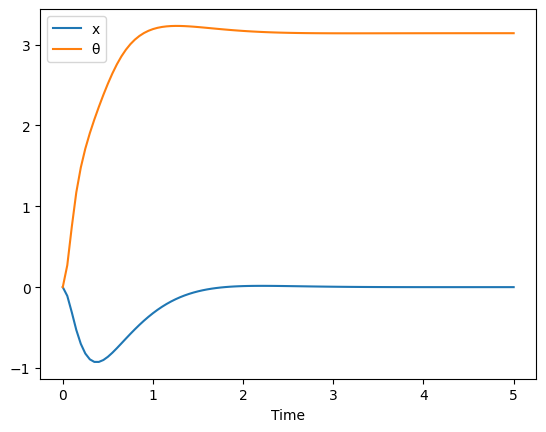

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot([k * dt for k in range(K)], [X_opt[k][0] for k in range(K)], label="x")
ax.plot([k * dt for k in range(K)], [X_opt[k][1] for k in range(K)], label="θ")

# ax.plot([k * dt for k in range(K)], [x_curr[k][0] for k in range(K)], label="x (feedback)")
# ax.plot([k * dt for k in range(K)], [x_curr[k][1] for k in range(K)], label="θ (feedback)")

plt.xlabel("Time")

plt.legend();

In [83]:
%matplotlib tk
import matplotlib.pyplot as plt # Plotting
from matplotlib.patches import Rectangle

plt.ion()
fig = plt.figure()
# for stopping simulation with the esc key.
fig.canvas.mpl_connect('key_release_event', lambda event: [exit(0) if event.key == 'escape' else None])

ax = fig.add_subplot(1, 1, 1)

for k in range(K):
    plt.cla()
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1., 1.)

    th = X_opt[k][1, 0]
    x = X_opt[k][0, 0]

    lp = 0.5
    ct = jnp.cos(-th + jnp.pi)
    st = jnp.sin(-th + jnp.pi)
    ax.plot(jnp.arange(-1.5, 1.5, 3./100.), jnp.zeros((100,)), '--', color="gray")
    ax.plot([0.], [lp], 'x', markersize=15, markeredgewidth=5, color="green")
    ax.plot([x, x + lp * st], [0., lp * ct], '-', linewidth=3)
    length = 0.5
    height = 0.1
    ax.add_patch(Rectangle((x - length/2., -height/2.), length, height,
             edgecolor = 'black',
             facecolor = 'orange',
             fill=True, zorder=2))
    plt.pause(0.1)

plt.close();

Authorization required, but no authorization protocol specified


ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running